In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from geopy import Point, distance
from datetime import datetime, time
import geopy # for dist between two points
import datetime


import warnings
warnings.filterwarnings('ignore')

1. Попробовать применить масштабирование <br>
2. Попробовать PolynomialFeatures <br>
3. GridSearchCV

latitude -> широта (вертикаль) <br>
longtitude -> долгота (горизонт)

In [2]:
x_train = pd.DataFrame(np.load('x_train.npy'))
x_test = pd.DataFrame(np.load('x_test.npy'))
y_train = pd.DataFrame(np.load('y_train.npy'))

In [3]:
# coordinate grid for train

lat = np.linspace(x_train['lat'].min() + 0.30, x_train['lat'].max(), 5)
long = np.linspace(x_train['long'].min() + 0.30, x_train['long'].max(), 5)

df = pd.DataFrame(x_train['lat'])
df['long'] = x_train['long']
df['coors_lat'] = 0
df['coors_long'] = 0
df['final_coors'] = 0


df['coors_lat'][np.where(df['lat'] <= lat[4])[0]] = 5
df['coors_lat'][np.where(df['lat'] <= lat[3])[0]] = 4
df['coors_lat'][np.where(df['lat'] <= lat[2])[0]] = 3
df['coors_lat'][np.where(df['lat'] <= lat[1])[0]] = 2
df['coors_lat'][np.where(df['lat'] <= lat[0])[0]] = 1

df['coors_long'][np.where(df['long'] <= long[4])[0]] = 5
df['coors_long'][np.where(df['long'] <= long[3])[0]] = 4
df['coors_long'][np.where(df['long'] <= long[2])[0]] = 3
df['coors_long'][np.where(df['long'] <= long[1])[0]] = 2
df['coors_long'][np.where(df['long'] <= long[0])[0]] = 1


df['coors_lat'] = df['coors_lat'].astype('str')
df['coors_long'] = df['coors_long'].astype('str')

df['final_coors'] = (df['coors_lat'] + '.' + df['coors_long']).astype('float')

# x_train['grid_coors_lat'] = df['coors_lat']
# x_train['grid_coors_long'] = df['coors_long']

x_train['grid_coors'] = df['final_coors']

In [4]:
# coordinate grid for test

lat = np.linspace(x_test['lat'].min() + 0.30, x_test['lat'].max(), 5)
long = np.linspace(x_test['long'].min() + 0.30, x_test['long'].max(), 5)

df = pd.DataFrame(x_test['lat'])
df['long'] = x_test['long']
df['coors_lat'] = 0
df['coors_long'] = 0
df['final_coors'] = 0


df['coors_lat'][np.where(df['lat'] <= lat[4])[0]] = 5
df['coors_lat'][np.where(df['lat'] <= lat[3])[0]] = 4
df['coors_lat'][np.where(df['lat'] <= lat[2])[0]] = 3
df['coors_lat'][np.where(df['lat'] <= lat[1])[0]] = 2
df['coors_lat'][np.where(df['lat'] <= lat[0])[0]] = 1

df['coors_long'][np.where(df['long'] <= long[4])[0]] = 5
df['coors_long'][np.where(df['long'] <= long[3])[0]] = 4
df['coors_long'][np.where(df['long'] <= long[2])[0]] = 3
df['coors_long'][np.where(df['long'] <= long[1])[0]] = 2
df['coors_long'][np.where(df['long'] <= long[0])[0]] = 1


df['coors_lat'] = df['coors_lat'].astype('str')
df['coors_long'] = df['coors_long'].astype('str')

df['final_coors'] = (df['coors_lat'] + '.' + df['coors_long']).astype('float')

# x_test['grid_coors_lat'] = df['coors_lat']
# x_test['grid_coors_long'] = df['coors_long']

x_test['grid_coors'] = df['final_coors']

In [5]:
# как давно делалась реконструкция
def add_diff(x_train):
    x_train['diff'] = 0
    for i in range(len(x_train)):
        cur_year = int(x_train.at[i, 'date'].split('-')[0])

        if x_train.at[i, 'yr_renovated'] == 0:
            x_train.at[i, 'diff'] = cur_year - x_train.at[i, 'yr_built']

        else:
            x_train.at[i, 'diff'] = cur_year - x_train.at[i, 'yr_renovated']


add_diff(x_train)
add_diff(x_test)

latitude -> 47.6205 <br>
longtitude -> -122.351

In [6]:


def dist_to_place(data, point, col_name):
    
    point = geopy.Point(point)
    dist_c = []
    for i in range(data.shape[0]):
        
        p1 = geopy.Point(data['lat'][i], data['long'][i])
        dist_c.append(distance.distance(p1, point).km)
    
    data[col_name] = dist_c
    return data

center = (47.6205, -122.351)
col_name = 'to_center'
x_train = dist_to_place(x_train, center, col_name)
x_test = dist_to_place(x_test, center, col_name)

In [7]:
# ТЦ

def nearest_place(data, coors, col_name):
    
    dists = np.array([])
    for i in range(data.shape[0]):
        all_dist = np.array([])
        
        p1 = geopy.Point(data['lat'][i], data['long'][i])
        for coor in coors:
            all_dist = np.append(all_dist, distance.distance(p1, coor).km)
           
        min_dist = np.min(all_dist)
        dists = np.append(dists, min_dist)
        
        
    data[col_name] = dists
    
    return data

coors = [(47.618133, -122.337716), (47.612810, -122.335250), (47.611979, -122.337680),
        (47.608838, -122.334781), (47.458191, -122.257653), (47.615017, -122.203804)]        

x_train = nearest_place(x_train, coors, 'to_tc')
x_test = nearest_place(x_test, coors, 'to_tc')


In [8]:
# to nearest park

coors = [(47.542327, -122.260187), (47.549485, -122.256932), (47.563399, -122.266781),
        (47.570636, -122.277513), (47.578884, -122.283542), (47.586352, -122.290139),
        (47.590653, -122.288834), (47.589435, -122.300671), (47.599150, -122.290911),
        (47.610156, -122.283442), (47.600389, -122.333184), (47.619538, -122.350058),
        (47.610138, -122.283567), (47.619210, -122.282165), (47.620070, -122.280180)]

x_train = nearest_place(x_train, coors, 'to_park')
x_test = nearest_place(x_test, coors, 'to_park')

In [9]:
# dostoprimechtel'nosti

coors = [(47.512994, -122.266172), (47.517737, -122.296393), (47.551505, -122.352433),
        (47.607280, -122.337958),  (47.629456, -122.359721)]

x_train = nearest_place(x_train, coors, 'to_dost')
x_test = nearest_place(x_test, coors, 'to_dost')

In [10]:
# to school

coors = [(47.643585, -122.350250), (47.641257, -122.316826), (47.632839, -122.352006),
        (47.621476, -122.350759), (47.658028, -122.308421), (47.652735, -122.313252)]

x_train = nearest_place(x_train, coors, 'to_school')
x_test = nearest_place(x_test, coors, 'to_school')

In [11]:
x_train['waterfront'] = x_train['waterfront'].astype('object')
# x_train
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 23 columns):
date             15000 non-null object
bedrooms         15000 non-null float32
bathrooms        15000 non-null float32
sqft_living      15000 non-null int32
sqft_lot         15000 non-null int32
floors           15000 non-null float32
waterfront       15000 non-null object
condition        15000 non-null int32
grade            15000 non-null int32
sqft_above       15000 non-null int32
sqft_basement    15000 non-null int32
yr_built         15000 non-null int32
yr_renovated     15000 non-null int32
zipcode          15000 non-null int32
lat              15000 non-null float32
long             15000 non-null float32
grid_coors       15000 non-null float64
diff             15000 non-null int64
to_center        15000 non-null float64
to_tc            15000 non-null float64
to_park          15000 non-null float64
to_dost          15000 non-null float64
to_school        15000 non-null f

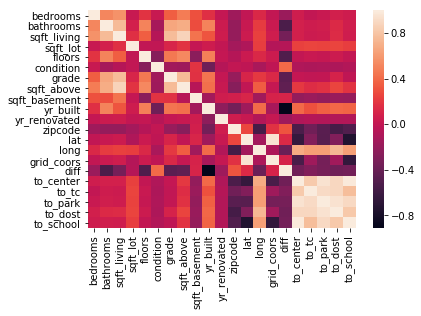

In [12]:
data = x_train.corr()
sns.heatmap(data)

plt.show()

In [13]:
x_train = x_train.drop(['sqft_above'], axis=1)
x_test = x_test.drop(['sqft_above'], axis=1)

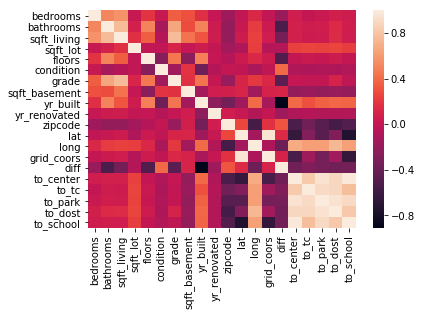

In [14]:
data = x_train.corr()
sns.heatmap(data)

plt.show()

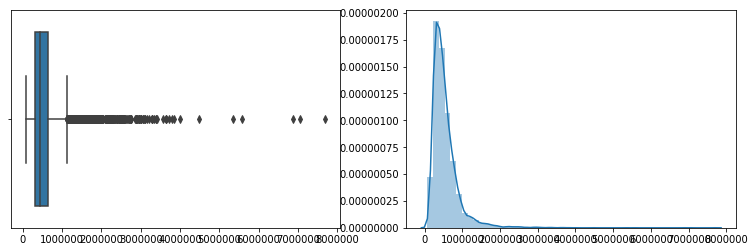

In [15]:
plt.figure(figsize=(13, 4))
plt.subplot(121)
sns.boxplot(y_train)
plt.subplot(122)
sns.distplot(y_train)
plt.show()

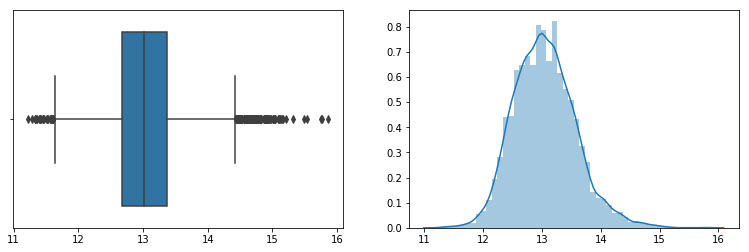

In [16]:
y_train = np.log(y_train)
plt.figure(figsize=(13, 4))
plt.subplot(121)
sns.boxplot(y_train)
plt.subplot(122)
sns.distplot(y_train)
plt.show()

In [17]:
# train

f1 = x_train['lat'].describe()['max']
f2 = x_train['long'].describe()['max']

df = pd.DataFrame()
df['lat'] = x_train['lat']
df['long'] = x_train['long']

df['add_lat'] = round((f1 - df['lat']), 1)
df['add_long'] = round((f2 - df['long']), 1)
x_train['lat_inf'] = df['add_lat']
x_train['long_inf'] = df['add_long']

# test

f1 = x_test['lat'].describe()['max']
f2 = x_test['long'].describe()['max']

df = pd.DataFrame()
df['lat'] = x_test['lat']
df['long'] = x_test['long']

df['add_lat'] = round((f1 - df['lat']), 1)
df['add_long'] = round((f2 - df['long']), 1)
x_test['lat_inf'] = df['add_lat']
x_test['long_inf'] = df['add_long']




In [18]:
# train

curr_year = datetime.datetime.now().year

x_train['since_built'] = np.abs(x_train['yr_built'] - curr_year)
x_test['since_built'] = np.abs(x_test['yr_built'] - curr_year)

In [20]:
x_train['date'] = x_train['date'].astype('datetime64')


# OneHotEncoding (на всякий случай оставил)

In [21]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

def one_hot_preprocessing(data):
    obj_cols = data.columns[data.dtypes == 'object']
    
    enc_data = [LabelEncoder().fit(data[col]) for col in obj_cols]
    trans_cols = np.stack([e.transform(data[col]) for e, col in zip(enc_data, obj_cols)]).T
    
    enc = OneHotEncoder()
    enc.fit(trans_cols)
    new_cols = enc.transform(trans_cols).toarray()
    
    exsist_cols = data.columns[data.dtypes != 'object']
    new_df = pd.DataFrame(new_cols, index=data.index)
    data = pd.concat([data[exsist_cols], new_df], axis=1)
    
    return data

In [25]:
from sklearn.model_selection import train_test_split

# for tuning hyperparametrs

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.3)


# Перевод даты в сезоны


In [22]:
x_test['date'] = x_test['date'].astype('datetime64')
x_test['waterfront'] = x_test['waterfront'].astype('str')

x_train['date']= x_train['date'].astype('datetime64')


In [23]:
df = one_hot_preprocessing(x_train)
x_train = df
x_train = x_train.rename(columns={0:'False', 1:'True'})

df = one_hot_preprocessing(x_test)
x_test = df
x_test = x_test.rename(columns={0:'False', 1:'True'})


In [24]:
# set geoposition. North or South

lat_c, long_c = 47.608155, -122.309512 # center of city

x_train.loc[x_train['lat'] > lat_c, 'geopos1'] = 'North' 
x_train.loc[x_train['lat'] <= lat_c, 'geopos1'] = 'South'

x_test.loc[x_test['lat'] > lat_c, 'geopos1'] = 'North' 
x_test.loc[x_test['lat'] <= lat_c, 'geopos1'] = 'South'


x_train = one_hot_preprocessing(x_train)
x_test = one_hot_preprocessing(x_test)

x_train = x_train.rename(columns={0:'North', 1:'South'})
x_test = x_test.rename(columns={0:'North', 1:'South'})

In [25]:
# # set geoposition. East or West

x_train.loc[x_train['long'] > long_c, 'geopos2'] = 'West' 
x_train.loc[x_train['long'] <= long_c, 'geopos2'] = 'East'

x_test.loc[x_test['long'] > long_c, 'geopos2'] = 'West' 
x_test.loc[x_test['long'] <= long_c, 'geopos2'] = 'East'

x_train = one_hot_preprocessing(x_train)
x_test = one_hot_preprocessing(x_test)

x_train = x_train.rename(columns={0:'West', 1:'East'})
x_test = x_test.rename(columns={0:'West', 1:'East'})

In [26]:

def to_day_of_year(date):
    
    doy = date.timetuple().tm_yday
    
    spring = range(60, 152)
    summer = range(152, 244)
    fall = range(244, 335)

    if doy in spring:
        season = 0
    elif doy in summer:
        season = 1
    elif doy in fall:
        season = 2
    else:
        season = 3
        
    return season

In [27]:
x_train['date'] = [to_day_of_year(i) for i in x_train['date']]
x_test['date'] = [to_day_of_year(i) for i in x_test['date']]


In [28]:
def mean_absolute_percentage_error(y_true, y_pred):
    
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100



In [30]:
def mape_scorer(estimator, X_test, y_test):
    return mean_absolute_percentage_error(np.exp(y_test), np.exp(estimator.predict(X_test)))

# Добавление примочек

In [35]:
from sklearn.model_selection import cross_validate, KFold

train_indices = []
test_indices = []
kfolds = KFold(n_splits=5, random_state=1, shuffle=True)
cv_folds = kfolds.split(x_train)
for train_index, test_index in cv_folds:
    train_indices.append(train_index)
    test_indices.append(test_index)

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor, HuberRegressor, ElasticNet



params = {'alpha' : np.linspace(-6, 6, 20)}

pipe_2 = Pipeline([('poly', PolynomialFeatures(2)), ('ridge', GridSearchCV(Ridge(), params))])

In [32]:
pipe_2.fit(x_train, y_train)
y_pred = pipe_2.predict(x_test)

# print(mean_absolute_percentage_error(np.exp(y_test), np.exp(y_pred))) # for tuning



In [34]:
# save

ids = [i for i in range(1, len(y_pred)+1)]
out = pd.DataFrame(columns=['Id', 'Price'])
out['Id'] = ids
out['Price'] = np.exp(y_pred)

out.to_csv('finish.csv', index=False)